In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
df2 = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27 (1) (1).xlsx')
df = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27.xlsx')
pd.set_option('display.max_colwidth', None)
df = df.sample(10000)   #Known Merchants
df2 = df2.sample(10000) #Unknown merchants
#df.head(5)

In [3]:
#df2

# Mix (Known and Unknown Merchants)

In [4]:
# Concatenating transaction descriptions columns
df["TRANSACTION_DETAILS"] = df['txn_desc1'].astype(str) +" %%%%% "+ df['txn_desc2'].astype(str)

In [5]:
df["LEN_WORDS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [6]:
df["LEN_WORDS"].describe()

count    10000.000000
mean        11.739500
std          4.115694
min          3.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         35.000000
Name: LEN_WORDS, dtype: float64

In [7]:
df["LEN_TOKENS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [8]:
df["LEN_TOKENS"].describe()

count    10000.000000
mean        17.945500
std          5.473724
min          5.250000
25%         14.000000
50%         17.000000
75%         21.000000
max         51.500000
Name: LEN_TOKENS, dtype: float64

In [9]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 20)


In [10]:
df.head()

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS
73880,DI3658,Ae83e567f67cd3fb3886aafdfdb25226d,T65f62019f7013c9ea4cb034ec9f2f7cf,7.56,USD,Point Of Sale Withdrawal ACORN,TV MONTHLY USHTTPSWWW.ACOR MDUS,NaN,2023-03-11,10050,ACORN TV,Unknow Payment Agent,NaN,2023-03-15,FTS_CSLK_TRANSAC_20230314_100006.csv,COLUMBIA CREDIT UNION,Services & Subscriptions,Point Of Sale Withdrawal ACORN %%%%% TV MONTHLY USHTTPSWWW.ACOR MDUS,10,17.00
37839,DI3648,Abd8c70630177312e980c570ba6fbe741,Taa544e0f29b03fe4b76aef0962f9687c,94.96,USD,DBT PURCHASE ON 01/07 @ 18:05,SAFEWAY #1173 LACEY WA CARD NBR: -6648,NaN,2023-01-08,12429,SAFEWAY,Unknow Payment Agent,NaN,2023-01-11,FTS_CSLK_TRANSAC_20230110_100006.csv,Harborstone Credit Union,Food & Drink,DBT PURCHASE ON 01/07 @ 18:05 %%%%% SAFEWAY #1173 LACEY WA CARD NBR: -6648,14,18.50
81190,DI1000,A4e7038b19b313e0692abb5d72fb44575,T7e7b5602dcdb3d678ecc3f1da241f91f,5.94,USD,POS PURCHASE,WHATABURGER 48 MARSHALL TX *,TX,2021-12-06,13117,WHATABURGER,Unknow Payment Agent,NaN,2021-12-09,FTS_CSLK_TRANSAC_20211208_100002.csv,VERABANK,Food & Drink,POS PURCHASE %%%%% WHATABURGER 48 MARSHALL TX *,8,11.75
65047,DI1644,A18685e2d4b8a392eb0f6f8abcece1b01,T6c462c676d943661a337404ebe9ddf90,49.35,USD,Withdrawal CONSUMER DEBIT,WM SUPERCENTER #204 270-365-7692 KY Date 02/06/23 0 *3895 0 5411 %% Card 18 #1672,NaN,2023-02-07,13085,WALMART,Unknow Payment Agent,NaN,2023-02-10,FTS_CSLK_TRANSAC_20230209_100006.csv,Fortera Federal Credit Union,Department Stores,Withdrawal CONSUMER DEBIT %%%%% WM SUPERCENTER #204 270-365-7692 KY Date 02/06/23 0 *3895 0 5411 %% Card 18 #1672,19,28.25
72688,DI8102,A39eae59a23cf3eca8a9fd679842f8480,T684eed4f119434ba8dcbb514278c6576,10.85,USD,POS Transaction,LITTLE CAESARS #3164 TUCSON AZUS,NaN,2023-01-23,11727,LITTLE CAESAR'S,Unknow Payment Agent,NaN,2023-01-27,FTS_CSLK_TRANSAC_20230126_100007.csv,Tucson Federal Credit Union,Food & Drink,POS Transaction %%%%% LITTLE CAESARS #3164 TUCSON AZUS,8,13.50


In [11]:
print('Total number of rows and columns:', df2.shape)

Total number of rows and columns: (10000, 17)


In [12]:
df2.head()

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name,category
75378,DI1641,Ac007938f571630ac824a74ef9b612637,T68d4c996292831f8a38d593f8ddb9d94,28.71,USD,Withdrawal CONSUMER DEBIT,SUN TOUCHED TANNING CO SAPULPA OK Date 12/01/22 ***74413 7298 %% Card 16 #9837,NaN,2022-12-02,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-12-07,FTS_CSLK_TRANSAC_20221206_100006.csv,Tulsa Federal Credit Union,NaN
36842,DI1425,Abfcdd125e27d35aa8d78275fd754dc23,T108313ee1fda356a897148bcfd3db8ad,43.80,USD,ACH Withdrawal AMEX EPAYMENT ER,AM - ACH PMT,MT,2022-02-04,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-02-06,FTS_CSLK_TRANSAC_20220205_100002.csv,Fairwinds Credit Union,NaN
29946,DI5113,Af75ed37c5ffb3d01b7c72e321dce71e3,T1dd9303f1942356eb43f5215d7da4ad7,5.34,USD,AC- PAYPAL INST XFER AIMEE MOORHEAD,NaN,NaN,2022-04-05,NaN,Unknow Merchant,PAYPAL,12131,2022-04-08,FTS_CSLK_TRANSAC_20220407_100001.csv,Bankplus,NaN
73137,DI3337,A54f28155e74b39b8851f7331a795c061,Tc09d53cccb723fa788da54857a61600c,800.00,USD,Withdrawal Home Banking,Personal Branch Transaction 10/03/2022 11:05 * Zelle MICHAEL VAUGHN 602-683-1000 Ref:*L02I11,NaN,2022-10-03,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-10-06,FTS_CSLK_TRANSAC_20221005_100007.csv,Arizona Federal Credit Union,NaN
73408,DI4049,A35b3ff23d3a43b9691747a1876eb85c4,Tdbe77c53dbe93e8eaf2a08a27363ee5d,30.00,USD,WITHDRAW,POS 1215 1546 * ASPEN FRESNO 412 FRESNO CA,CA,2022-12-15,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-12-18,FTS_CSLK_TRANSAC_20221217_100006.csv,Noble Credit Union,NaN


# Unknown Merchant Names
- Selecting dataset with known menchants only for Entity Ruler
- Selecting dataset with unknown merchants only for Entity recognition
- Checking the number of rows and columns
- Concatenate transaction descriptions columns

In [13]:
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True) 

In [14]:
df_unknown_merchs2 = df2[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True)

In [15]:
# Concatenating transaction descriptions columns
df_unknown_merchs2["TRANSACTION_DETAILS"] = df_unknown_merchs2['txn_desc1'].astype(str) +" %%%%% "+ df_unknown_merchs2['txn_desc2'].astype(str)

In [16]:
df_unknown_merchs2["LEN_WORDS"] = df_unknown_merchs2["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [17]:
df_unknown_merchs2["LEN_WORDS"].describe()

count    10000.000000
mean        11.382800
std          4.757513
min          3.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         29.000000
Name: LEN_WORDS, dtype: float64

In [18]:
df_unknown_merchs2["LEN_TOKENS"] = df_unknown_merchs2["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [19]:
df_unknown_merchs2["LEN_TOKENS"].describe()

count    10000.000000
mean        17.253500
std          6.491428
min          3.500000
25%         12.750000
50%         16.000000
75%         21.250000
max         41.000000
Name: LEN_TOKENS, dtype: float64

In [20]:
#Copy of the afs merchant names column
df_unknown_merchs2['AFS_MECHANT_NAMES'] = df_unknown_merchs2['merchant_name']
# Droping original cols
df_unknown_merchs2 = df_unknown_merchs2.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

In [21]:
df_unknown_merchs2

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
75378,T68d4c996292831f8a38d593f8ddb9d94,NaN,Withdrawal CONSUMER DEBIT %%%%% SUN TOUCHED TANNING CO SAPULPA OK Date 12/01/22 ***74413 7298 %% Card 16 #9837,18,27.50,Unknow Merchant
36842,T108313ee1fda356a897148bcfd3db8ad,NaN,ACH Withdrawal AMEX EPAYMENT ER %%%%% AM - ACH PMT,10,12.50,Unknow Merchant
29946,T1dd9303f1942356eb43f5215d7da4ad7,NaN,AC- PAYPAL INST XFER AIMEE MOORHEAD %%%%% nan,8,11.25,Unknow Merchant
73137,Tc09d53cccb723fa788da54857a61600c,NaN,Withdrawal Home Banking %%%%% Personal Branch Transaction 10/03/2022 11:05 * Zelle MICHAEL VAUGHN 602-683-1000 Ref:*L02I11,15,30.50,Unknow Merchant
73408,Tdbe77c53dbe93e8eaf2a08a27363ee5d,NaN,WITHDRAW %%%%% POS 1215 1546 * ASPEN FRESNO 412 FRESNO CA,11,14.25,Unknow Merchant
...,...,...,...,...,...,...
87712,T223af359bee036eea03a5203b7b979f3,NaN,WITHDRAW %%%%% NATIONAL GENERALPAYMENT FEB 27,6,11.25,Unknow Merchant
27742,T4306260d2da53b2a947521b2abb3bc1a,NaN,Withdrawal PARADISE POOL LL %%%%% TYPE: BILL PAYMT ID: M*550 DATA: BILL PAY FEE CO: PARADISE POOL LL %% ACH ECC PPD %% ACH Trace **074,26,33.50,Unknow Merchant
69624,Tc7433113d1ea3d6cb20e953389fb6974,NaN,Withdrawal MasterCard DC %%%%% PAYPAL *STITCHF 7700 EASTPORT PARKWAY 4029 Date 03/07/23 4 *453 8 5691,16,25.25,Unknow Merchant
54618,T7045879d187c3422aa4012a3e9fd1c56,NaN,Withdrawal CAPITAL ONE AUTO %%%%% TYPE: CARPAY ID: *9806 CO: CAPITAL ONE AUTO NAME: BYRON M MARTIN %% ACH Trace **235,21,29.25,Unknow Merchant


- Removed “WITHDRAWAL” ,“ATM” and “TRANSFER” rows
- Data cleaning

In [22]:
#df_unknown_merchs2 = df_unknown_merchs2[.str.contains("Withdrawal") == False]
# filter rows without the words 
df_unknown_merchs2 = df_unknown_merchs2[~(df_unknown_merchs2["TRANSACTION_DETAILS"].str.contains('with', case=False) | df_unknown_merchs2['TRANSACTION_DETAILS'].str.contains('transf', case=False) | df_unknown_merchs2['TRANSACTION_DETAILS'].str.contains('ATM'))]

In [23]:
df_unknown_merchs2

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
29946,T1dd9303f1942356eb43f5215d7da4ad7,NaN,AC- PAYPAL INST XFER AIMEE MOORHEAD %%%%% nan,8,11.25,Unknow Merchant
40982,T4579afe980423d3b950350cceaaf623e,NaN,HOMEQ SERVICING BILL PAYMT %%%%% nan,6,9.00,Unknow Merchant
16107,Td6fa3c55c37131978cdd42968ce7c2f0,NaN,DDA PUR YAHOO *Pl %%%%% YAHOO *Plus Secure 800-577-4760 VA *,11,15.00,Unknow Merchant
6366,Te73a5fdc844d3c51a7fb6db303b12fd6,NaN,POS Transaction %%%%% nan,4,6.25,Unknow Merchant
56638,Tf39545c7ad36377fa7e0404e56e1254b,NaN,Afterpay %%%%% afterpay.com CAUS : POS Transaction,7,12.50,Unknow Merchant
...,...,...,...,...,...,...
4945,T99693ad4f4573eee819b96fdb96667a9,NaN,PAYMENT TO LOAN 167 %%%%% Internet Access 03/01/2023 20:21 *.,10,15.25,Unknow Merchant
21750,T82256e1ce357314596ae4cbc902dda31,NaN,XFER TO ACCT CK-** %%%%% nan,6,7.00,Unknow Merchant
54547,T3a53565bae0c3b238df27bdb8461dec9,NaN,KNEADERS OF LEHI 801-* US %%%%% nan,7,8.75,Unknow Merchant
1997,T5ea0daa5c5d031ceb04635464a102bb8,NaN,POS Debit %%%%% VENMO* VENMO* Visa Direct NYUS,8,11.50,Unknow Merchant


In [24]:
df_unknown_merchs2.shape

(3644, 6)

In [25]:
df_unknown_merchs2 = df_unknown_merchs2[df_unknown_merchs2["TRANSACTION_DETAILS"].str.contains("WITHDRAWAL") == False]

In [26]:
df_unknown_merchs2.shape

(3644, 6)

- Known Merchants
- Concatenate transaction descriptions columns

In [27]:
#df_unknown_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True)
#df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_known_merchs.shape)

Total number of rows and columns: (10000, 6)


In [28]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [29]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,category,TRANSACTION_DETAILS
73880,T65f62019f7013c9ea4cb034ec9f2f7cf,Point Of Sale Withdrawal ACORN,TV MONTHLY USHTTPSWWW.ACOR MDUS,Unknow Payment Agent,ACORN TV,Services & Subscriptions,Point Of Sale Withdrawal ACORN %%%%% TV MONTHLY USHTTPSWWW.ACOR MDUS
37839,Taa544e0f29b03fe4b76aef0962f9687c,DBT PURCHASE ON 01/07 @ 18:05,SAFEWAY #1173 LACEY WA CARD NBR: -6648,Unknow Payment Agent,SAFEWAY,Food & Drink,DBT PURCHASE ON 01/07 @ 18:05 %%%%% SAFEWAY #1173 LACEY WA CARD NBR: -6648
81190,T7e7b5602dcdb3d678ecc3f1da241f91f,POS PURCHASE,WHATABURGER 48 MARSHALL TX *,Unknow Payment Agent,WHATABURGER,Food & Drink,POS PURCHASE %%%%% WHATABURGER 48 MARSHALL TX *
65047,T6c462c676d943661a337404ebe9ddf90,Withdrawal CONSUMER DEBIT,WM SUPERCENTER #204 270-365-7692 KY Date 02/06/23 0 *3895 0 5411 %% Card 18 #1672,Unknow Payment Agent,WALMART,Department Stores,Withdrawal CONSUMER DEBIT %%%%% WM SUPERCENTER #204 270-365-7692 KY Date 02/06/23 0 *3895 0 5411 %% Card 18 #1672
72688,T684eed4f119434ba8dcbb514278c6576,POS Transaction,LITTLE CAESARS #3164 TUCSON AZUS,Unknow Payment Agent,LITTLE CAESAR'S,Food & Drink,POS Transaction %%%%% LITTLE CAESARS #3164 TUCSON AZUS


In [30]:
df_unknown_merchs2.shape

(3644, 6)

In [31]:
df_unknown_merchs2.head(5)

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
29946,T1dd9303f1942356eb43f5215d7da4ad7,NaN,AC- PAYPAL INST XFER AIMEE MOORHEAD %%%%% nan,8,11.25,Unknow Merchant
40982,T4579afe980423d3b950350cceaaf623e,NaN,HOMEQ SERVICING BILL PAYMT %%%%% nan,6,9.00,Unknow Merchant
16107,Td6fa3c55c37131978cdd42968ce7c2f0,NaN,DDA PUR YAHOO *Pl %%%%% YAHOO *Plus Secure 800-577-4760 VA *,11,15.00,Unknow Merchant
6366,Te73a5fdc844d3c51a7fb6db303b12fd6,NaN,POS Transaction %%%%% nan,4,6.25,Unknow Merchant
56638,Tf39545c7ad36377fa7e0404e56e1254b,NaN,Afterpay %%%%% afterpay.com CAUS : POS Transaction,7,12.50,Unknow Merchant


In [32]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [33]:
#Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

In [34]:
df_known_merchs.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
73880,T65f62019f7013c9ea4cb034ec9f2f7cf,Services & Subscriptions,Point Of Sale Withdrawal ACORN %%%%% TV MONTHLY USHTTPSWWW.ACOR MDUS,ACORN TV
37839,Taa544e0f29b03fe4b76aef0962f9687c,Food & Drink,DBT PURCHASE ON 01/07 @ 18:05 %%%%% SAFEWAY #1173 LACEY WA CARD NBR: -6648,SAFEWAY
81190,T7e7b5602dcdb3d678ecc3f1da241f91f,Food & Drink,POS PURCHASE %%%%% WHATABURGER 48 MARSHALL TX *,WHATABURGER
65047,T6c462c676d943661a337404ebe9ddf90,Department Stores,Withdrawal CONSUMER DEBIT %%%%% WM SUPERCENTER #204 270-365-7692 KY Date 02/06/23 0 *3895 0 5411 %% Card 18 #1672,WALMART
72688,T684eed4f119434ba8dcbb514278c6576,Food & Drink,POS Transaction %%%%% LITTLE CAESARS #3164 TUCSON AZUS,LITTLE CAESAR'S


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [35]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'] #.str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")
#df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [36]:
df_unknown_merchs_pred2 = df_unknown_merchs2.copy(deep=True)
df_unknown_merchs_pred2['AFS_MECHANT_NAMES'] = df_unknown_merchs_pred2['AFS_MECHANT_NAMES'] #.str.lower()
df_unknown_merchs_pred2['TRANSACTION_DETAILS']= df_unknown_merchs_pred2['TRANSACTION_DETAILS'].str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ").str.replace('DBT', '')
#df_unknown_merchs_pred2['TRANSACTION_DETAILS']= df_unknown_merchs_pred2['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [37]:
df_known_merchs_pred.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
73880,T65f62019f7013c9ea4cb034ec9f2f7cf,Services & Subscriptions,point of sale withdrawal acorn %%%%% tv monthly ushttpswww.acor mdus,ACORN TV
37839,Taa544e0f29b03fe4b76aef0962f9687c,Food & Drink,dbt purchase on 01/07 18:05 %%%%% safeway 1173 lacey wa card nbr: -6648,SAFEWAY
81190,T7e7b5602dcdb3d678ecc3f1da241f91f,Food & Drink,pos purchase %%%%% whataburger 48 marshall tx,WHATABURGER
65047,T6c462c676d943661a337404ebe9ddf90,Department Stores,withdrawal consumer debit %%%%% wm supercenter 204 270-365-7692 ky date 02/06/23 0 3895 0 5411 %% card 18 1672,WALMART
72688,T684eed4f119434ba8dcbb514278c6576,Food & Drink,pos transaction %%%%% little caesars 3164 tucson azus,LITTLE CAESAR'S


- Defining patterns for Entity Ruler
- Adding rules to "patterns" using def_patterns() function
- find_org() function to implement Entity Ruler and extract entities
- "junk" list created to avoid noise in results

In [38]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    return patterns

In [39]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

In [40]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_lg")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip','ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840',
            'pd1387','ma(9661','ns4qa9xb3 ','DBT','VISA','PYPL','AMEX','Payment','CRD','DEB','Visa Direct','PYPL','WTHDRL','OverDraft',
            'Payroll','NIC','-0118','855-','-0118','POS PURCH','-0118','855-','ref auth','800-712-5407','PIN','-0118','888-',
            '-0118','855-','ON 10/25 TST','855-','ON 10/25 TST','POS DEBIT','800-712-5407','POS PURCH','ON 10/25 TST','-0118','PIN','DEUS',
            '-1419','TST','TRF','ref auth','FLUS','-1419','-1419','XFER','POS DEBIT','-8016','ref auth','-8016','AVE','1943','POS DEBIT','PAYPAL',
            'CRD 1812 09/10/22','XX8963 POS','POS Transaction','ref  auth', 'DEBIT','-9143','Date 07/31/22  51630 5999','06/14/22,(03/21/23','DEBIT',
            '-6417','4551','877-','01/28/23','ref  auth','auth','ref','Purchase','CRD','PUR']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

In [41]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [42]:
df_known_merchs_pred.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
73880,T65f62019f7013c9ea4cb034ec9f2f7cf,Services & Subscriptions,point of sale withdrawal acorn %%%%% tv monthly ushttpswww.acor mdus,ACORN TV
37839,Taa544e0f29b03fe4b76aef0962f9687c,Food & Drink,dbt purchase on 01/07 18:05 %%%%% safeway 1173 lacey wa card nbr: -6648,SAFEWAY
81190,T7e7b5602dcdb3d678ecc3f1da241f91f,Food & Drink,pos purchase %%%%% whataburger 48 marshall tx,WHATABURGER
65047,T6c462c676d943661a337404ebe9ddf90,Department Stores,withdrawal consumer debit %%%%% wm supercenter 204 270-365-7692 ky date 02/06/23 0 3895 0 5411 %% card 18 1672,WALMART
72688,T684eed4f119434ba8dcbb514278c6576,Food & Drink,pos transaction %%%%% little caesars 3164 tucson azus,LITTLE CAESAR'S


In [43]:
df_unknown_merchs_pred2.head(10)

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
29946,T1dd9303f1942356eb43f5215d7da4ad7,NaN,AC- PAYPAL INST XFER AIMEE MOORHEAD %%%%% nan,8,11.25,Unknow Merchant
40982,T4579afe980423d3b950350cceaaf623e,NaN,HOMEQ SERVICING BILL PAYMT %%%%% nan,6,9.00,Unknow Merchant
16107,Td6fa3c55c37131978cdd42968ce7c2f0,NaN,DDA PUR YAHOO Pl %%%%% YAHOO Plus Secure 800-577-4760 VA,11,15.00,Unknow Merchant
6366,Te73a5fdc844d3c51a7fb6db303b12fd6,NaN,POS Transaction %%%%% nan,4,6.25,Unknow Merchant
56638,Tf39545c7ad36377fa7e0404e56e1254b,NaN,Afterpay %%%%% afterpay.com CAUS : POS Transaction,7,12.50,Unknow Merchant
69647,T16f9d60580d03aea9df20290c9f0511c,NaN,POS Transaction %%%%% THE MOCHA HOUSE - Y YOUNGSTOWN OHUS,10,14.25,Unknow Merchant
51318,T6b1f67e9e640390ba582f704ccbb66c7,NaN,PURCHASE ON 12/12 05:30 %%%%% EL GRAN POLLO EL GRAN POLLO TOWS TOWSON MD CARD NBR: -2547,19,23.50,Unknow Merchant
35509,Tee82bffe58e53f3f8fe8463fd308de93,NaN,DEBIT CARD DEBIT %%%%% 02-16-2023 GOLDSMITH PHARMACY SAINT LOUIS MO auth,12,18.75,Unknow Merchant
55978,T156adb6a0b783708b00ab876ceb3fbfd,NaN,PURCHASE %%%%% auth 94352 01-03-2023 DD DOORDASH MCDO 855-973-1040 CA,11,18.00,Unknow Merchant
94487,T4b6bb354a017382990949cb87108903f,NaN,POS Transaction %%%%% MIKES DRIVE THRU WARREN OHUS,8,12.50,Unknow Merchant


In [44]:
t_list = df_unknown_merchs_pred2[['transaction_id', 'category','TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES']].copy(deep=True).to_dict(orient='records') 
#replace similarity w unique ID

In [45]:
par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

100%|██████████| 3644/3644 [38:58<00:00,  1.56it/s]


In [46]:
df_unknown_merchs_pred2 = pd.DataFrame(par)

In [47]:
#par

In [48]:
df_unknown_merchs_pred2.sample(10)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
53,T71e1dad40b9334fbbb0e3f25b71a228a,NaN,POS FIOS ON DEMAND %%%%% 800-837-4966 FLUS,Unknow Merchant,POS FIOS
2849,T5a1ac582183b36999bfdb47b6af85e34,NaN,VANTIS LIFE PAYMENT %%%%% nan,Unknow Merchant,VANTIS LIFE
2959,T9024598aeca13dff9356d0bf810fb0c4,NaN,PURCHASE 10-30 Jump Start 10 McPherson KS STR 6292 %%%%% nan,Unknow Merchant,McPherson
956,T151c0750965a3517bf1d3be47c595738,NaN,DEBIT CARD DEBIT %%%%% auth 10-09-2021 SQ INSPIRED CHA BERKELEY SPRIWV,Unknow Merchant,SQ INSPIRED CHA BERKELEY
2312,Te76aa41741b632f98df2602919cd98e5,NaN,DDA PUR LABEL SHOP %%%%% 496 WEST PLAZA DRIV COLUMBIA CITY IN,Unknow Merchant,WEST PLAZA DRIV COLUMBIA
779,T3887a55b9c243474a11137585ce09efd,NaN,Card purchase %%%%% CSC ServiceWorks,Unknow Merchant,NA
884,T34fc7bd948913891817e9070f67b7449,NaN,PURCHASE ON 03/03 18:06 %%%%% LUSH TACOMA MALL (404) TACOMA WA CARD NBR: -2518,Unknow Merchant,NA
491,Tf0c9fb9c4a0534b4b2b6a74cc1c77265,NaN,RANCHERITOS OREM %%%%% nan,Unknow Merchant,RANCHERITOS OREM %
2097,T32ae3584a5823e58881c94a8885bd4f1,NaN,FP L %%%%% Bill Payment Transaction,Unknow Merchant,Bill Payment Transaction FP L
1015,T4f7c8401aac13328a5c892320a52e587,NaN,POS MTA METROCARD MACHINEW %%%%% YORK NYUS,Unknow Merchant,MACHINEW


In [49]:
df_unknown_merchs_pred2 = df_unknown_merchs_pred2[~(df_unknown_merchs_pred2["PREDICTIONS"].str.contains('NA', case=False))]

In [50]:
df_unknown_merchs_pred2.sample(50)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
2300,T6988290757a93b438c81d3afec0113e1,NaN,DEBIT CARD DEBIT %%%%% auth 12-15-2022 HOMESERVE USA 888-666-8075 CT Eff. Date:,Unknow Merchant,HOMESERVE USA 888-666-8075 CT Eff
2514,Tf9bb5e1b2861365992763098be0bc2c5,NaN,FEE %%%%% POS 0303 1254 160 E SUNRISE HIGHW FREEPORT NY,Unknow Merchant,HIGHW
1108,T00be4c1140d33dc886cd7c1b9bc36128,NaN,AC-CHASE CREDIT CRD-EPAY %%%%% nan,Unknow Merchant,AC-CHASE
1494,T4cb0c557b3bc3bafb50f43e74cb56829,NaN,AC-IRS -USATAXPYMT %%%%% nan,Unknow Merchant,AC-IRS
662,Tbb8fb12ab4743f77ab09e2e8cda4a3f4,NaN,DEBIT CARD DEBIT %%%%% ref auth 08-16-2022 SNACK SODA VENDI HAMMOND IN Eff. Date:,Unknow Merchant,ref auth
1257,T1bc60dd087a43db68f8b4091acca4f9c,NaN,PARTNERS 1ST FED BILL PAYMT %%%%% nan,Unknow Merchant,FED
1399,T6aec68fc9b85383485fc37f9dc2527bd,NaN,PURCHASE ON 07/17 17:24 %%%%% LOG CABIN BAR GRILL LACEY WA CARD NBR: -6312,Unknow Merchant,LOG BAR GRILL LACEY
2150,Teca7a1f88eae3ad68e0230fbfad58b63,NaN,JPMorgan Chase %%%%% ID: 2231 CO: JPMorgan Chase NAME: JACOB R MANGUM %% ACH ECC WEB,Unknow Merchant,JPMorgan Chase JPMorgan
586,T9b3e4b95035837e9ac0deb8b8b1ff21b,NaN,TWINSTAR CU ECM LOAN PAY %%%%% nan,Unknow Merchant,TWINSTAR CU ECM LOAN
494,T550ab9e7fba13c7db63f8a22c4872750,NaN,AC-NGRID36 -NGRID36WEB %%%%% nan,Unknow Merchant,AC-NGRID36


In [51]:
# set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
#print(df_unknown_merchs_pred2)

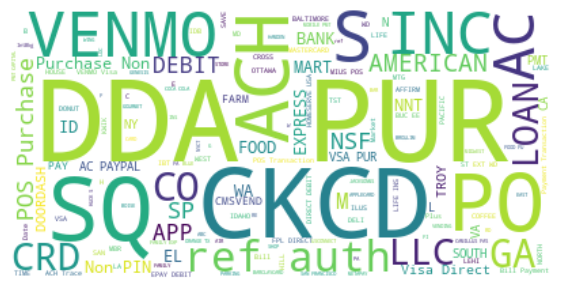

In [53]:
# Word cloud for more frequent merchant names
word_cloud(df_unknown_merchs_pred2.PREDICTIONS)

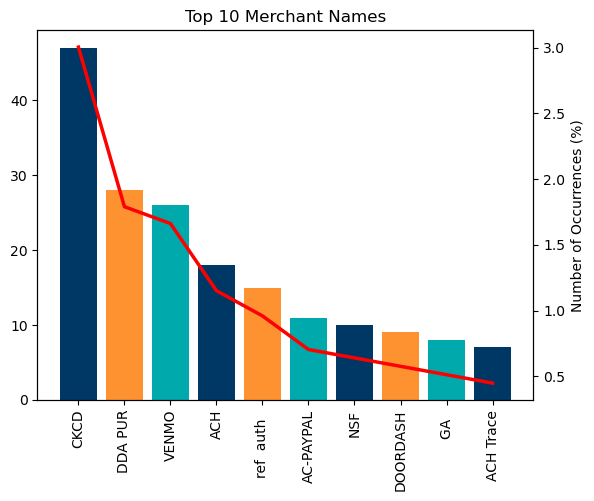

In [54]:
#df = pd.read_csv('data.csv')
top_categories = df_unknown_merchs_pred2['PREDICTIONS'].value_counts().nlargest(10)
category_percentages = top_categories / len(df_unknown_merchs_pred2) * 100

# Define a custom color palette
colors = ['#003865', '#FF9230', '#00A9AB']

plt.xticks(rotation=90)
plt.bar(top_categories.index, top_categories.values, align='center', color=colors)

ax2 = plt.twinx()
#ax2.set_ylim([0, 100])
ax2.plot(category_percentages.index, category_percentages.values, color='red', linewidth=2.5)
ax2.set_ylabel('Percentage')

plt.xlabel('Category')
plt.ylabel('Number of Occurrences (%)')
plt.title('Top 10 Merchant Names')

plt.show()